# Initialize

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [3]:
import sys
import importlib

# Add the parent directory to sys.path
sys.path.append("..")

# Import and reload the module
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/data_process_utils.py">

In [4]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/evaluation_functions.py">

# Data Loading

In [31]:
finance_df=pd.read_csv("../../../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df=finance_df

num_samples = int(len(df) * 0.30)

df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))

df_sampled = df_sampled.sample(n=num_samples, random_state=42).reset_index(drop=True)

df_sampled

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_49268/2600933533.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,402,PAYMENT,2293.60,C357857862,82351.00,80057.40,M1737315637,0.00,0.00,0,0
1,226,CASH_OUT,112620.18,C1690757109,128.00,0.00,C1858194355,0.00,112620.18,0,0
2,202,TRANSFER,41450.02,C186607867,7761.00,0.00,C996190755,0.00,41450.02,0,0
3,300,CASH_OUT,88887.47,C997373544,283.00,0.00,C247732967,2395169.12,2484056.59,0,0
4,235,TRANSFER,1059586.98,C1898581284,2010.00,0.00,C418902856,2456601.85,3516188.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1908781,400,CASH_IN,199255.80,C1443439100,92106.00,291361.80,C63022763,0.00,0.00,0,0
1908782,355,CASH_OUT,344019.25,C736748207,0.00,0.00,C1239114523,998029.93,1342049.18,0,0
1908783,276,CASH_IN,145108.10,C2144495050,11321.00,156429.10,C1494206372,278152.44,133044.34,0,0
1908784,37,CASH_OUT,189165.99,C251177355,0.00,0.00,C1815144574,817453.72,1006619.71,0,0


### Cleaning

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

finance_df = df_sampled

df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

final_df=df_smote_balanced

final_df = final_df.sort_values(by='step').astype(float)

df=final_df

y = df['isFraud']
X = df.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_49268/2877776214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_49268/2877776214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


After SMOTE - Fraudulent: 82810, Fraud Percentage: 9.09%


In [35]:
X_train.shape

(728735, 7)

In [36]:
y_train.value_counts()

isFraud
0.0    662349
1.0     66386
Name: count, dtype: int64

Defining a QNode
================



In [21]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [22]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [23]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [24]:
import pennylane as qml
import matplotlib.pyplot as plt

In [25]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

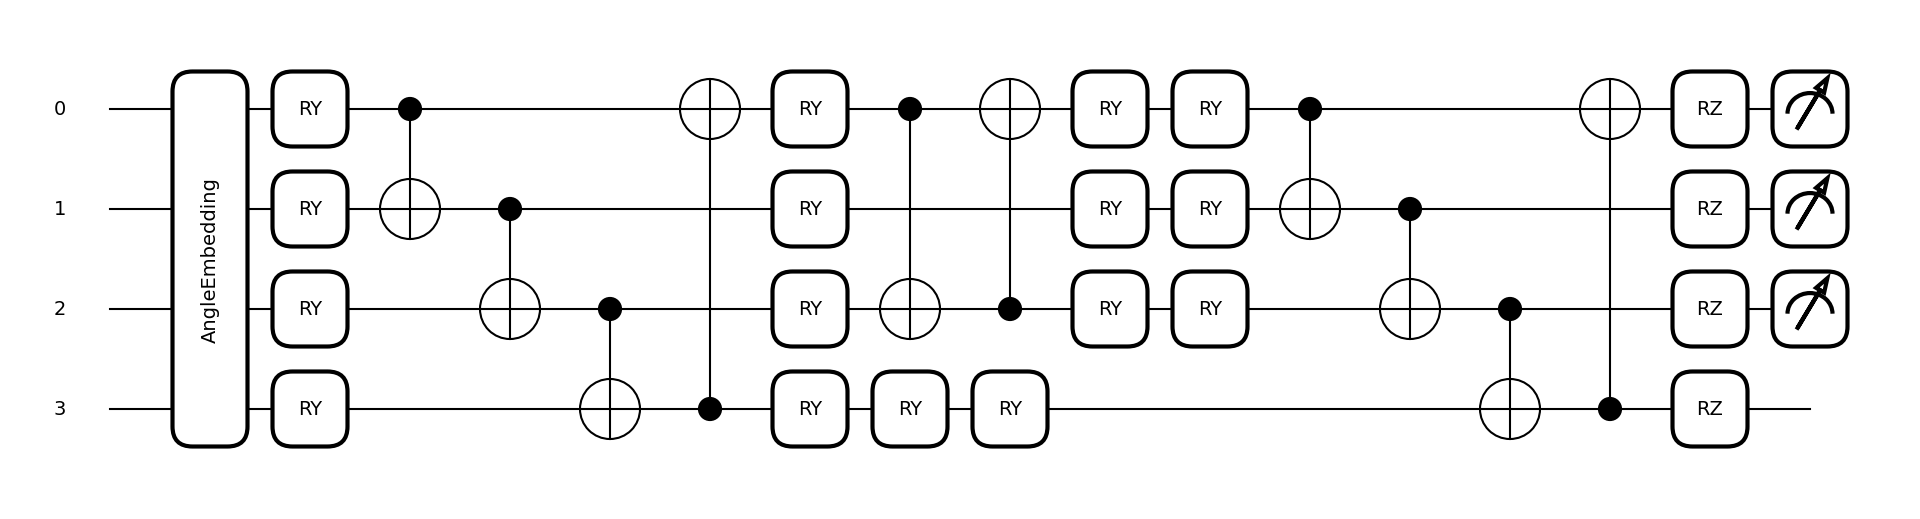

In [26]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [27]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


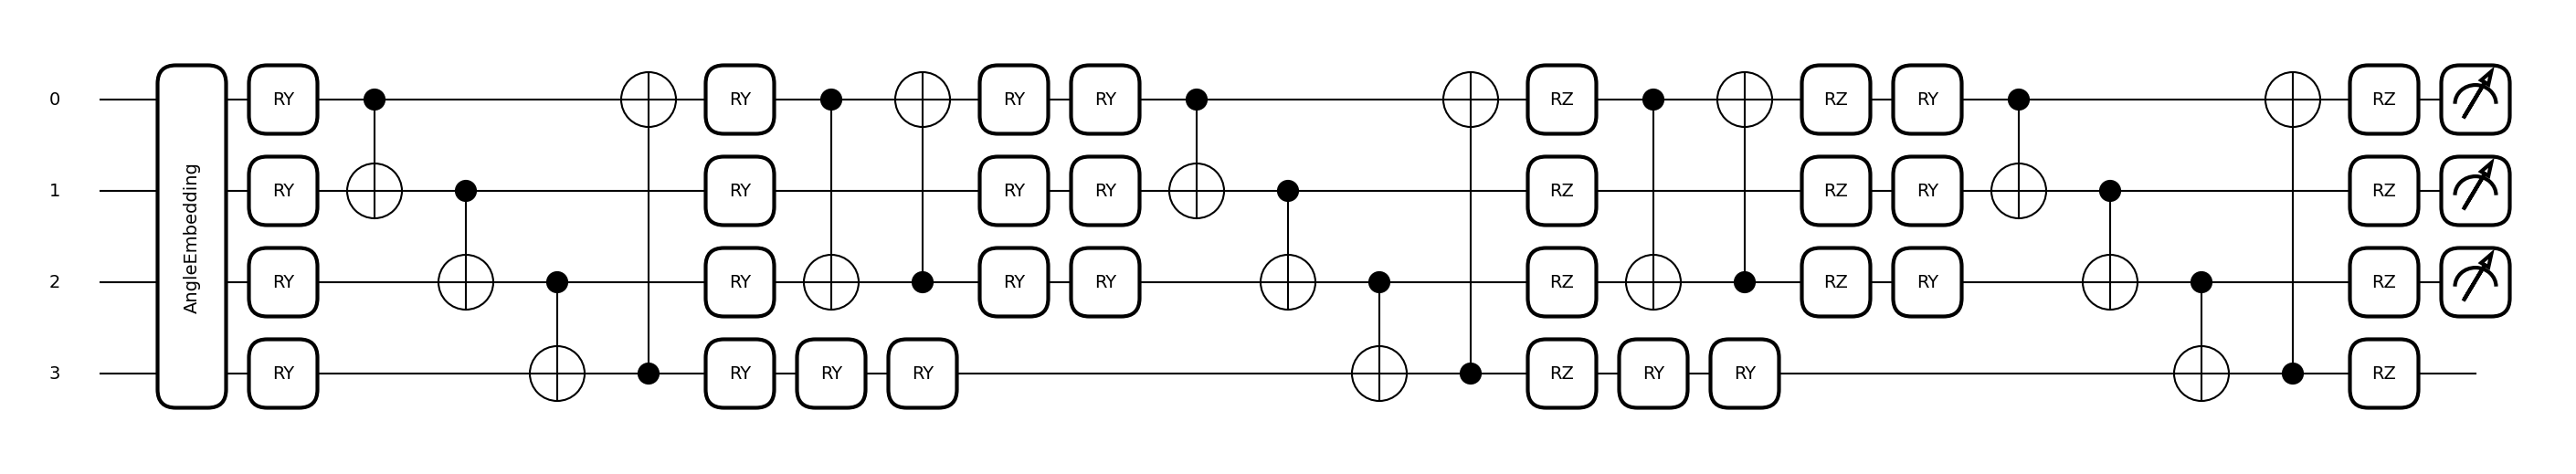

In [28]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

plt.show()

In [29]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

Metal device set to: Apple M2 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2025-02-09 18:03:13.935153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-09 18:03:13.935180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [317]:
from sklearn.metrics import classification_report

In [318]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [319]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [320]:
# Run multiple training iterations and save the models
for i in range(5):
    print(f"Iteration {i+1}")

    # Classic model
    classic_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])
    classic_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        classic_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=5, shuffle=True, verbose=1)
    eval.evaluate_model(classic_model, X_test, y_test)
    classic_model.save(f"classic_model_iteration_{i+1}.h5")
    print("Evaluating Quantum Model")
    print("====================================================================================================================================")

    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer,
        Dense(2, activation=tf.nn.softmax)
    ])

    quantum_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        quantum_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=5, shuffle=True, verbose=1)
    eval.evaluate_model(quantum_model, X_test, y_test)
    quantum_model.save(f"quantum_model_iteration_{i+1}.h5")
    print("====================================================================================================================================")


Iteration 1
Epoch 1/5


/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 14:01:05.997840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9730

2025-01-26 14:01:13.437727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - 9s 3ms/step - loss: 0.0827 - accuracy: 0.9730 - val_loss: 0.0461 - val_accuracy: 0.9826
Epoch 2/5
3416/3416 [==============================] - 9s 2ms/step - loss: 0.0414 - accuracy: 0.9849 - val_loss: 0.0362 - val_accuracy: 0.9865
Epoch 3/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0346 - accuracy: 0.9870 - val_loss: 0.0310 - val_accuracy: 0.9880
Epoch 4/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0311 - accuracy: 0.9881 - val_loss: 0.0315 - val_accuracy: 0.9861
Epoch 5/5
 142/1424 [=>............................] - ETA: 1s

2025-01-26 14:01:48.476237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 1ms/step
Confusion Matrix:
[[165498    424]
 [  1265  14997]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.92      0.95     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.96      0.97    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/3416 [..............................] - ETA: 3:51 - loss: 0.4896 - accuracy: 0.8984

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3416/3416 [==============================] - 247s 72ms/step - loss: 0.0776 - accuracy: 0.9753 - val_loss: 0.0532 - val_accuracy: 0.9829
Epoch 2/5
3416/3416 [==============================] - 249s 73ms/step - loss: 0.0475 - accuracy: 0.9841 - val_loss: 0.0559 - val_accuracy: 0.9804
Epoch 3/5
3416/3416 [==============================] - 244s 71ms/step - loss: 0.0422 - accuracy: 0.9855 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 4/5
3416/3416 [==============================] - 245s 72ms/step - loss: 0.0402 - accuracy: 0.9863 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 5/5
1424/1424 [==============================] - 148s 104ms/step
Confusion Matrix:
[[161751   4171]
 [   391  15871]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    165922
         1.0       0.79      0.98      0.87     16262

    accuracy                           0.97    182184
   macro avg       0.89      0.98      0.93    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 14:24:49.374484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3407/3416 [============================>.] - ETA: 0s - loss: 0.0691 - accuracy: 0.9775

2025-01-26 14:24:56.487125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - 8s 2ms/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.0455 - val_accuracy: 0.9834
Epoch 2/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0427 - accuracy: 0.9849 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 3/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0382 - accuracy: 0.9861 - val_loss: 0.0414 - val_accuracy: 0.9864
Epoch 4/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0355 - accuracy: 0.9874 - val_loss: 0.0343 - val_accuracy: 0.9878
Epoch 5/5
 154/1424 [==>...........................] - ETA: 1s

2025-01-26 14:25:30.273947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 985us/step
Confusion Matrix:
[[165305    617]
 [  1786  14476]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.89      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.94      0.96    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/3416 [..............................] - ETA: 3:53 - loss: 0.9059 - accuracy: 0.0977

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3416/3416 [==============================] - 236s 69ms/step - loss: 0.1080 - accuracy: 0.9662 - val_loss: 0.0638 - val_accuracy: 0.9806
Epoch 2/5
3416/3416 [==============================] - 231s 68ms/step - loss: 0.0625 - accuracy: 0.9802 - val_loss: 0.0708 - val_accuracy: 0.9776
Epoch 3/5
3416/3416 [==============================] - 232s 68ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.0669 - val_accuracy: 0.9785
Epoch 4/5
3416/3416 [==============================] - 232s 68ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0590 - val_accuracy: 0.9793
Epoch 5/5
1424/1424 [==============================] - 144s 101ms/step
Confusion Matrix:
[[165502    420]
 [  2032  14230]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.88      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.94      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 14:47:20.564281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3399/3416 [============================>.] - ETA: 0s - loss: 0.0892 - accuracy: 0.9696

2025-01-26 14:47:27.699333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - 8s 2ms/step - loss: 0.0891 - accuracy: 0.9696 - val_loss: 0.0699 - val_accuracy: 0.9767
Epoch 2/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0644 - accuracy: 0.9776 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 3/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0588 - accuracy: 0.9797 - val_loss: 0.0704 - val_accuracy: 0.9768
Epoch 4/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0550 - accuracy: 0.9807 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 5/5
 150/1424 [==>...........................] - ETA: 1s

2025-01-26 14:48:01.679489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 956us/step
Confusion Matrix:
[[164651   1271]
 [  1779  14483]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.92      0.89      0.90     16262

    accuracy                           0.98    182184
   macro avg       0.95      0.94      0.95    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/3416 [..............................] - ETA: 3:33 - loss: 0.4538 - accuracy: 0.8867

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3416/3416 [==============================] - 230s 67ms/step - loss: 0.0871 - accuracy: 0.9708 - val_loss: 0.0555 - val_accuracy: 0.9801
Epoch 2/5
3416/3416 [==============================] - 232s 68ms/step - loss: 0.0470 - accuracy: 0.9837 - val_loss: 0.0506 - val_accuracy: 0.9861
Epoch 3/5
3416/3416 [==============================] - 233s 68ms/step - loss: 0.0453 - accuracy: 0.9847 - val_loss: 0.0444 - val_accuracy: 0.9829
Epoch 4/5
3416/3416 [==============================] - 233s 68ms/step - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 5/5
1424/1424 [==============================] - 145s 102ms/step
Confusion Matrix:
[[165132    790]
 [  1364  14898]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.92      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.96      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 15:09:48.870815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3395/3416 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9750

2025-01-26 15:09:55.963203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - 8s 2ms/step - loss: 0.0739 - accuracy: 0.9751 - val_loss: 0.0523 - val_accuracy: 0.9834
Epoch 2/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0455 - accuracy: 0.9844 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 3/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0408 - accuracy: 0.9861 - val_loss: 0.0412 - val_accuracy: 0.9859
Epoch 4/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9879
Epoch 5/5
 153/1424 [==>...........................] - ETA: 1s

2025-01-26 15:10:29.552789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 953us/step
Confusion Matrix:
[[164446   1476]
 [   765  15497]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165922
         1.0       0.91      0.95      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.95      0.97      0.96    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/3416 [..............................] - ETA: 3:40 - loss: 1.5483 - accuracy: 0.0820

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3416/3416 [==============================] - 229s 67ms/step - loss: 0.0999 - accuracy: 0.9636 - val_loss: 0.0576 - val_accuracy: 0.9808
Epoch 2/5
3416/3416 [==============================] - 230s 67ms/step - loss: 0.0494 - accuracy: 0.9824 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 3/5
3416/3416 [==============================] - 234s 69ms/step - loss: 0.0412 - accuracy: 0.9848 - val_loss: 0.0430 - val_accuracy: 0.9793
Epoch 4/5
3416/3416 [==============================] - 235s 69ms/step - loss: 0.0357 - accuracy: 0.9867 - val_loss: 0.0419 - val_accuracy: 0.9826
Epoch 5/5
1424/1424 [==============================] - 145s 101ms/step
Confusion Matrix:
[[164173   1749]
 [   537  15725]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165922
         1.0       0.90      0.97      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.95      0.98      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 15:32:18.844773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3408/3416 [============================>.] - ETA: 0s - loss: 0.0965 - accuracy: 0.9682

2025-01-26 15:32:26.008312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3416/3416 [==============================] - 8s 2ms/step - loss: 0.0964 - accuracy: 0.9683 - val_loss: 0.0487 - val_accuracy: 0.9840
Epoch 2/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0431 - accuracy: 0.9845 - val_loss: 0.0388 - val_accuracy: 0.9842
Epoch 3/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 4/5
3416/3416 [==============================] - 8s 2ms/step - loss: 0.0329 - accuracy: 0.9879 - val_loss: 0.0289 - val_accuracy: 0.9890
Epoch 5/5
 153/1424 [==>...........................] - ETA: 1s

2025-01-26 15:32:59.961144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 939us/step
Confusion Matrix:
[[165235    687]
 [  1419  14843]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.91      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/3416 [..............................] - ETA: 3:36 - loss: 0.4428 - accuracy: 0.9297

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3416/3416 [==============================] - 229s 67ms/step - loss: 0.0849 - accuracy: 0.9716 - val_loss: 0.0638 - val_accuracy: 0.9762
Epoch 2/5
3416/3416 [==============================] - 229s 67ms/step - loss: 0.0508 - accuracy: 0.9821 - val_loss: 0.0472 - val_accuracy: 0.9836
Epoch 3/5
3416/3416 [==============================] - 234s 68ms/step - loss: 0.0468 - accuracy: 0.9849 - val_loss: 0.0419 - val_accuracy: 0.9872
Epoch 4/5
3416/3416 [==============================] - 235s 69ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0389 - val_accuracy: 0.9872
Epoch 5/5
1424/1424 [==============================] - 145s 102ms/step
Confusion Matrix:
[[165666    256]
 [  2479  13783]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.98      0.85      0.91     16262

    accuracy                           0.98    182184
   macro avg       0.98      0.92      0.95    182184
weight

In [321]:
# Run multiple training iterations and save the models
for i in range(10):
    print(f"Iteration {i+1}")

    # Classic model
    classic_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])
    classic_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        classic_model.fit(X_train, y_train, validation_split=0.2, batch_size=256, epochs=5, shuffle=True, verbose=1)
    eval.evaluate_model(classic_model, X_test, y_test)
    classic_model.save(f"classic_model_iteration_experiment_2{i+1}.h5")
    print("Evaluating Quantum Model")
    print("====================================================================================================================================")
    # Quantum model
    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer,
        Dense(2, activation=tf.nn.softmax)
    ])
    quantum_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        quantum_model.fit(X_train, y_train, validation_split=0.2, batch_size=256, epochs=5, shuffle=True, verbose=1)
    eval.evaluate_model(quantum_model, X_test, y_test)
    quantum_model.save(f"quantum_model_iteration_experiment_2{i+1}.h5")
    print("====================================================================================================================================")
91.6

Iteration 1
Epoch 1/5


/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


  47/1708 [..............................] - ETA: 3s - loss: 0.5028 - accuracy: 0.8704 

2025-01-26 15:57:24.249658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1704/1708 [============================>.] - ETA: 0s - loss: 0.0986 - accuracy: 0.9693

2025-01-26 15:57:27.941401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 2ms/step - loss: 0.0985 - accuracy: 0.9693 - val_loss: 0.0622 - val_accuracy: 0.9789
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9809 - val_loss: 0.0497 - val_accuracy: 0.9820
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9836 - val_loss: 0.0426 - val_accuracy: 0.9858
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9854 - val_loss: 0.0377 - val_accuracy: 0.9855
Epoch 5/5
 144/1424 [==>...........................] - ETA: 1s

2025-01-26 15:57:45.180626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 985us/step
Confusion Matrix:
[[165524    398]
 [  1887  14375]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.88      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.94      0.96    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:57 - loss: 1.8588 - accuracy: 0.0664

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 126s 74ms/step - loss: 0.1515 - accuracy: 0.9482 - val_loss: 0.0622 - val_accuracy: 0.9781
Epoch 2/5
1708/1708 [==============================] - 131s 77ms/step - loss: 0.0533 - accuracy: 0.9811 - val_loss: 0.0505 - val_accuracy: 0.9824
Epoch 3/5
1708/1708 [==============================] - 131s 77ms/step - loss: 0.0467 - accuracy: 0.9836 - val_loss: 0.0483 - val_accuracy: 0.9860
Epoch 4/5
1708/1708 [==============================] - 132s 78ms/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 0.0410 - val_accuracy: 0.9856
Epoch 5/5
1424/1424 [==============================] - 148s 104ms/step
Confusion Matrix:
[[165320    602]
 [  1955  14307]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.88      0.92     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.94      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 16:11:09.584957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1706/1708 [============================>.] - ETA: 0s - loss: 0.1092 - accuracy: 0.9654

2025-01-26 16:11:13.378472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9654 - val_loss: 0.0752 - val_accuracy: 0.9743
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9750 - val_loss: 0.0767 - val_accuracy: 0.9735
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9773 - val_loss: 0.0591 - val_accuracy: 0.9802
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9817 - val_loss: 0.0527 - val_accuracy: 0.9804
Epoch 5/5
 156/1424 [==>...........................] - ETA: 1s

2025-01-26 16:11:30.946139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 934us/step
Confusion Matrix:
[[165241    681]
 [  2135  14127]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.87      0.91     16262

    accuracy                           0.98    182184
   macro avg       0.97      0.93      0.95    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:09 - loss: 0.6214 - accuracy: 0.8672

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 127s 74ms/step - loss: 0.0931 - accuracy: 0.9702 - val_loss: 0.0521 - val_accuracy: 0.9832
Epoch 2/5
1708/1708 [==============================] - 126s 74ms/step - loss: 0.0476 - accuracy: 0.9833 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 3/5
1708/1708 [==============================] - 127s 74ms/step - loss: 0.0448 - accuracy: 0.9850 - val_loss: 0.0462 - val_accuracy: 0.9832
Epoch 4/5
1708/1708 [==============================] - 130s 76ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 5/5
1424/1424 [==============================] - 149s 104ms/step
Confusion Matrix:
[[164131   1791]
 [   698  15564]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165922
         1.0       0.90      0.96      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.95      0.97      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 16:24:42.723079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1689/1708 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9669

2025-01-26 16:24:46.490799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 3ms/step - loss: 0.1011 - accuracy: 0.9669 - val_loss: 0.0813 - val_accuracy: 0.9715
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.0808 - val_accuracy: 0.9755
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9766 - val_loss: 0.0710 - val_accuracy: 0.9779
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9774 - val_loss: 0.0902 - val_accuracy: 0.9779
Epoch 5/5
 154/1424 [==>...........................] - ETA: 1s

2025-01-26 16:25:03.874436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 953us/step
Confusion Matrix:
[[164759   1163]
 [  2648  13614]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    165922
         1.0       0.92      0.84      0.88     16262

    accuracy                           0.98    182184
   macro avg       0.95      0.92      0.93    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:02 - loss: 0.9190 - accuracy: 0.1152

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 128s 75ms/step - loss: 0.1074 - accuracy: 0.9634 - val_loss: 0.0741 - val_accuracy: 0.9748
Epoch 2/5
1708/1708 [==============================] - 124s 73ms/step - loss: 0.0628 - accuracy: 0.9785 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 3/5
1708/1708 [==============================] - 125s 73ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0551 - val_accuracy: 0.9812
Epoch 4/5
1708/1708 [==============================] - 447s 262ms/step - loss: 0.0494 - accuracy: 0.9832 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 5/5
1424/1424 [==============================] - 147s 103ms/step
Confusion Matrix:
[[165265    657]
 [  1606  14656]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.90      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weigh

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 16:43:19.705300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1689/1708 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9665

2025-01-26 16:43:23.527610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9667 - val_loss: 0.0928 - val_accuracy: 0.9739
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9754 - val_loss: 0.0740 - val_accuracy: 0.9755
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0688 - accuracy: 0.9766 - val_loss: 0.0696 - val_accuracy: 0.9769
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9771 - val_loss: 0.0706 - val_accuracy: 0.9784
Epoch 5/5
 142/1424 [=>............................] - ETA: 1s

2025-01-26 16:43:41.333610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 1ms/step
Confusion Matrix:
[[165088    834]
 [  2731  13531]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    165922
         1.0       0.94      0.83      0.88     16262

    accuracy                           0.98    182184
   macro avg       0.96      0.91      0.94    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:00 - loss: 0.5988 - accuracy: 0.8008

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 128s 75ms/step - loss: 0.1073 - accuracy: 0.9649 - val_loss: 0.0643 - val_accuracy: 0.9783
Epoch 2/5
1708/1708 [==============================] - 129s 75ms/step - loss: 0.0568 - accuracy: 0.9796 - val_loss: 0.0544 - val_accuracy: 0.9811
Epoch 3/5
1708/1708 [==============================] - 132s 77ms/step - loss: 0.0472 - accuracy: 0.9835 - val_loss: 0.0471 - val_accuracy: 0.9853
Epoch 4/5
1708/1708 [==============================] - 134s 78ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 5/5
1424/1424 [==============================] - 150s 105ms/step
Confusion Matrix:
[[165296    626]
 [  1481  14781]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.91      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.95      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 16:57:09.577050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1698/1708 [============================>.] - ETA: 0s - loss: 0.1256 - accuracy: 0.9607

2025-01-26 16:57:13.525410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9608 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9813 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9839 - val_loss: 0.0483 - val_accuracy: 0.9842
Epoch 4/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0432 - accuracy: 0.9852 - val_loss: 0.0496 - val_accuracy: 0.9827
Epoch 5/5
 144/1424 [==>...........................] - ETA: 1s

2025-01-26 16:57:31.408433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 979us/step
Confusion Matrix:
[[165205    717]
 [  1624  14638]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.90      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.95      0.96    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:57 - loss: 0.6570 - accuracy: 0.8242

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 123s 72ms/step - loss: 0.1006 - accuracy: 0.9678 - val_loss: 0.0681 - val_accuracy: 0.9715
Epoch 2/5
1708/1708 [==============================] - 121s 71ms/step - loss: 0.0531 - accuracy: 0.9811 - val_loss: 0.0517 - val_accuracy: 0.9827
Epoch 3/5
1708/1708 [==============================] - 122s 71ms/step - loss: 0.0433 - accuracy: 0.9847 - val_loss: 0.0439 - val_accuracy: 0.9832
Epoch 4/5
1708/1708 [==============================] - 131s 77ms/step - loss: 0.0403 - accuracy: 0.9856 - val_loss: 0.0383 - val_accuracy: 0.9880
Epoch 5/5
1424/1424 [==============================] - 141s 99ms/step
Confusion Matrix:
[[165274    648]
 [  1368  14894]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.96      0.92      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.96      0.97    182184
weighte

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 17:10:15.983121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1697/1708 [============================>.] - ETA: 0s - loss: 0.1002 - accuracy: 0.9676

2025-01-26 17:10:19.684019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 4s 2ms/step - loss: 0.1000 - accuracy: 0.9677 - val_loss: 0.0823 - val_accuracy: 0.9707
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9750 - val_loss: 0.0751 - val_accuracy: 0.9782
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9768 - val_loss: 0.0692 - val_accuracy: 0.9756
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9773 - val_loss: 0.0681 - val_accuracy: 0.9783
Epoch 5/5
 157/1424 [==>...........................] - ETA: 1s

2025-01-26 17:10:36.628847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 1s 936us/step
Confusion Matrix:
[[165004    918]
 [  2721  13541]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    165922
         1.0       0.94      0.83      0.88     16262

    accuracy                           0.98    182184
   macro avg       0.96      0.91      0.94    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:46 - loss: 0.4414 - accuracy: 0.8867

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 124s 72ms/step - loss: 0.0984 - accuracy: 0.9678 - val_loss: 0.0663 - val_accuracy: 0.9766
Epoch 2/5
1708/1708 [==============================] - 125s 73ms/step - loss: 0.0603 - accuracy: 0.9789 - val_loss: 0.0631 - val_accuracy: 0.9806
Epoch 3/5
1708/1708 [==============================] - 126s 74ms/step - loss: 0.0540 - accuracy: 0.9809 - val_loss: 0.0555 - val_accuracy: 0.9826
Epoch 4/5
1708/1708 [==============================] - 126s 74ms/step - loss: 0.0496 - accuracy: 0.9823 - val_loss: 0.0511 - val_accuracy: 0.9805
Epoch 5/5
1424/1424 [==============================] - 144s 101ms/step
Confusion Matrix:
[[165033    889]
 [  1858  14404]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.94      0.89      0.91     16262

    accuracy                           0.98    182184
   macro avg       0.97      0.94      0.95    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 17:23:28.484392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1704/1708 [============================>.] - ETA: 0s - loss: 0.1077 - accuracy: 0.9661

2025-01-26 17:23:32.453335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9661 - val_loss: 0.0553 - val_accuracy: 0.9809
Epoch 2/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0469 - accuracy: 0.9836 - val_loss: 0.0414 - val_accuracy: 0.9845
Epoch 3/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0389 - accuracy: 0.9858 - val_loss: 0.0378 - val_accuracy: 0.9845
Epoch 4/5
1708/1708 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9873 - val_loss: 0.0334 - val_accuracy: 0.9857
Epoch 5/5
 144/1424 [==>...........................] - ETA: 1s

2025-01-26 17:23:50.699622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165506    416]
 [  1411  14851]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.91      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.96      0.97    182184
weighted avg       0.99      0.99      0.99    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:58 - loss: 0.6048 - accuracy: 0.9141

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 130s 76ms/step - loss: 0.0964 - accuracy: 0.9701 - val_loss: 0.0622 - val_accuracy: 0.9779
Epoch 2/5
1708/1708 [==============================] - 128s 75ms/step - loss: 0.0550 - accuracy: 0.9816 - val_loss: 0.0567 - val_accuracy: 0.9817
Epoch 3/5
1708/1708 [==============================] - 129s 75ms/step - loss: 0.0456 - accuracy: 0.9843 - val_loss: 0.0422 - val_accuracy: 0.9835
Epoch 4/5
1708/1708 [==============================] - 129s 75ms/step - loss: 0.0418 - accuracy: 0.9859 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 5/5
1424/1424 [==============================] - 156s 110ms/step
Confusion Matrix:
[[164804   1118]
 [  1009  15253]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.93      0.94      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.96      0.97      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 17:37:14.985160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1702/1708 [============================>.] - ETA: 0s - loss: 0.0982 - accuracy: 0.9664

2025-01-26 17:37:18.987527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.9664 - val_loss: 0.0550 - val_accuracy: 0.9817
Epoch 2/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0478 - accuracy: 0.9833 - val_loss: 0.0447 - val_accuracy: 0.9823
Epoch 3/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.9857 - val_loss: 0.0417 - val_accuracy: 0.9847
Epoch 4/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0361 - accuracy: 0.9872 - val_loss: 0.0354 - val_accuracy: 0.9864
Epoch 5/5
 139/1424 [=>............................] - ETA: 1s

2025-01-26 17:37:37.265589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[164662   1260]
 [  1772  14490]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.92      0.89      0.91     16262

    accuracy                           0.98    182184
   macro avg       0.95      0.94      0.95    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:54 - loss: 0.4067 - accuracy: 0.8965

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 131s 77ms/step - loss: 0.1084 - accuracy: 0.9649 - val_loss: 0.0829 - val_accuracy: 0.9740
Epoch 2/5
1708/1708 [==============================] - 128s 75ms/step - loss: 0.0775 - accuracy: 0.9755 - val_loss: 0.0789 - val_accuracy: 0.9740
Epoch 3/5
1708/1708 [==============================] - 130s 76ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 4/5
1708/1708 [==============================] - 129s 76ms/step - loss: 0.0599 - accuracy: 0.9798 - val_loss: 0.0604 - val_accuracy: 0.9835
Epoch 5/5
1424/1424 [==============================] - 161s 113ms/step
Confusion Matrix:
[[165442    480]
 [  2243  14019]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.86      0.91     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.93      0.95    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 17:51:22.024219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1702/1708 [============================>.] - ETA: 0s - loss: 0.1087 - accuracy: 0.9643

2025-01-26 17:51:25.948785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1086 - accuracy: 0.9643 - val_loss: 0.0923 - val_accuracy: 0.9678
Epoch 2/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9725 - val_loss: 0.0850 - val_accuracy: 0.9697
Epoch 3/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0750 - accuracy: 0.9732 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 4/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9790 - val_loss: 0.0587 - val_accuracy: 0.9815
Epoch 5/5
 140/1424 [=>............................] - ETA: 1s

2025-01-26 17:51:43.643145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[164888   1034]
 [  1862  14400]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    165922
         1.0       0.93      0.89      0.91     16262

    accuracy                           0.98    182184
   macro avg       0.96      0.94      0.95    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 1:54 - loss: 1.1035 - accuracy: 0.1035

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 130s 76ms/step - loss: 0.1155 - accuracy: 0.9605 - val_loss: 0.0627 - val_accuracy: 0.9788
Epoch 2/5
1708/1708 [==============================] - 129s 75ms/step - loss: 0.0553 - accuracy: 0.9806 - val_loss: 0.0515 - val_accuracy: 0.9774
Epoch 3/5
1708/1708 [==============================] - 132s 77ms/step - loss: 0.0448 - accuracy: 0.9838 - val_loss: 0.0506 - val_accuracy: 0.9777
Epoch 4/5
1708/1708 [==============================] - 132s 77ms/step - loss: 0.0400 - accuracy: 0.9860 - val_loss: 0.0367 - val_accuracy: 0.9901
Epoch 5/5
1424/1424 [==============================] - 149s 105ms/step
Confusion Matrix:
[[165162    760]
 [  1360  14902]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.95      0.92      0.93     16262

    accuracy                           0.99    182184
   macro avg       0.97      0.96      0.96    182184
weight

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-01-26 18:05:03.777839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1706/1708 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.9633

2025-01-26 18:05:07.733901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1708/1708 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9633 - val_loss: 0.0767 - val_accuracy: 0.9752
Epoch 2/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0703 - accuracy: 0.9769 - val_loss: 0.0774 - val_accuracy: 0.9724
Epoch 3/5
1708/1708 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9776 - val_loss: 0.0692 - val_accuracy: 0.9777
Epoch 4/5
1708/1708 [==============================] - 4s 3ms/step - loss: 0.0644 - accuracy: 0.9783 - val_loss: 0.0642 - val_accuracy: 0.9791
Epoch 5/5
 149/1424 [==>...........................] - ETA: 1s

2025-01-26 18:05:25.728845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[164823   1099]
 [  2543  13719]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    165922
         1.0       0.93      0.84      0.88     16262

    accuracy                           0.98    182184
   macro avg       0.96      0.92      0.94    182184
weighted avg       0.98      0.98      0.98    182184

Evaluating Quantum Model
Epoch 1/5
   2/1708 [..............................] - ETA: 2:00 - loss: 0.8520 - accuracy: 0.1172

/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/q_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1708/1708 [==============================] - 127s 75ms/step - loss: 0.1110 - accuracy: 0.9641 - val_loss: 0.0706 - val_accuracy: 0.9748
Epoch 2/5
1708/1708 [==============================] - 127s 74ms/step - loss: 0.0609 - accuracy: 0.9791 - val_loss: 0.0529 - val_accuracy: 0.9800
Epoch 3/5
1708/1708 [==============================] - 129s 75ms/step - loss: 0.0499 - accuracy: 0.9824 - val_loss: 0.0455 - val_accuracy: 0.9856
Epoch 4/5
1708/1708 [==============================] - 127s 74ms/step - loss: 0.0435 - accuracy: 0.9848 - val_loss: 0.0411 - val_accuracy: 0.9839
Epoch 5/5
1424/1424 [==============================] - 152s 107ms/step
Confusion Matrix:
[[165536    386]
 [  1472  14790]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    165922
         1.0       0.97      0.91      0.94     16262

    accuracy                           0.99    182184
   macro avg       0.98      0.95      0.97    182184
weight

In [350]:
import pandas as pd

# Assuming X_train, Y_train, and X_test are your datasets
# Convert them to DataFrames if they are not already
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
# Save the datasets to CSV files

X_train_df.to_csv('X_train.csv', index=False)
Y_train_df.to_csv('y_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

# More Layers

In [57]:
n_layers = 3
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

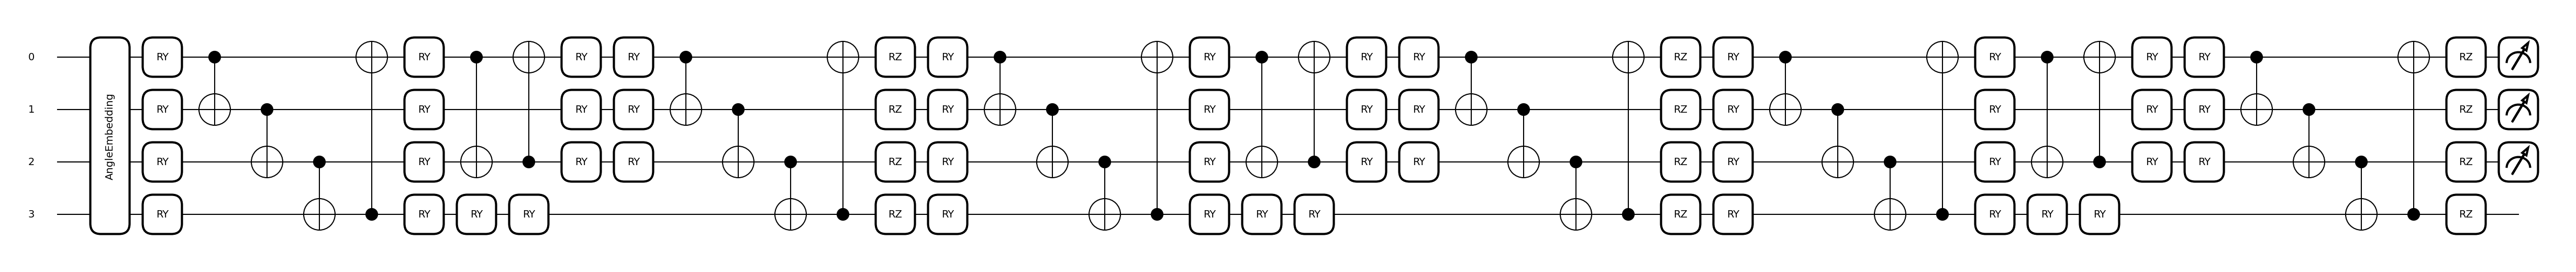

In [58]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()